In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
train = pd.read_csv('final_train.csv', index_col = 'Unnamed: 0')
test = pd.read_csv('final_test.csv', index_col = 'Unnamed: 0')

### Feature Engineering

In [71]:
#Adding avg_measure to the dataset
train['avg_measure'] = (train['Length'] + train['Width']) / 2
test['avg_measure'] = (test['Length'] + test['Width']) / 2

In [72]:
#Defining features
features = ['top_features',
 'comfort_features',
 'interior_features',
 'exterior_features',
 'safety_features']
test['Features'] = np.sum(test[features], axis = 1)
train['Features'] = np.sum(train[features], axis = 1)

In [73]:
#Valves feature
train['Valves'] = train['No of Cylinder'] * train['Valves per Cylinder']
test['Valves'] = test['No of Cylinder'] * test['Valves per Cylinder']

In [74]:
#Tread Features
train['Tread'] = (train['Front Tread'] + train['Rear Tread'])/ 2
test['Tread'] = (test['Front Tread'] + test['Rear Tread'])/ 2

In [75]:
#Dropping the unnecessary columns
to_drop = ['top_features', 'No of Cylinder', 'Valves per Cylinder',
       'comfort_features', 'interior_features', 'exterior_features',
       'safety_features','Length', 'Width', 'Front Tread', 'Rear Tread',
        'Height', 'Wheel Base']

In [76]:
#Dropping the columns
train = train.drop(to_drop, axis = 1)
test = test.drop(to_drop, axis = 1)

<Axes: >

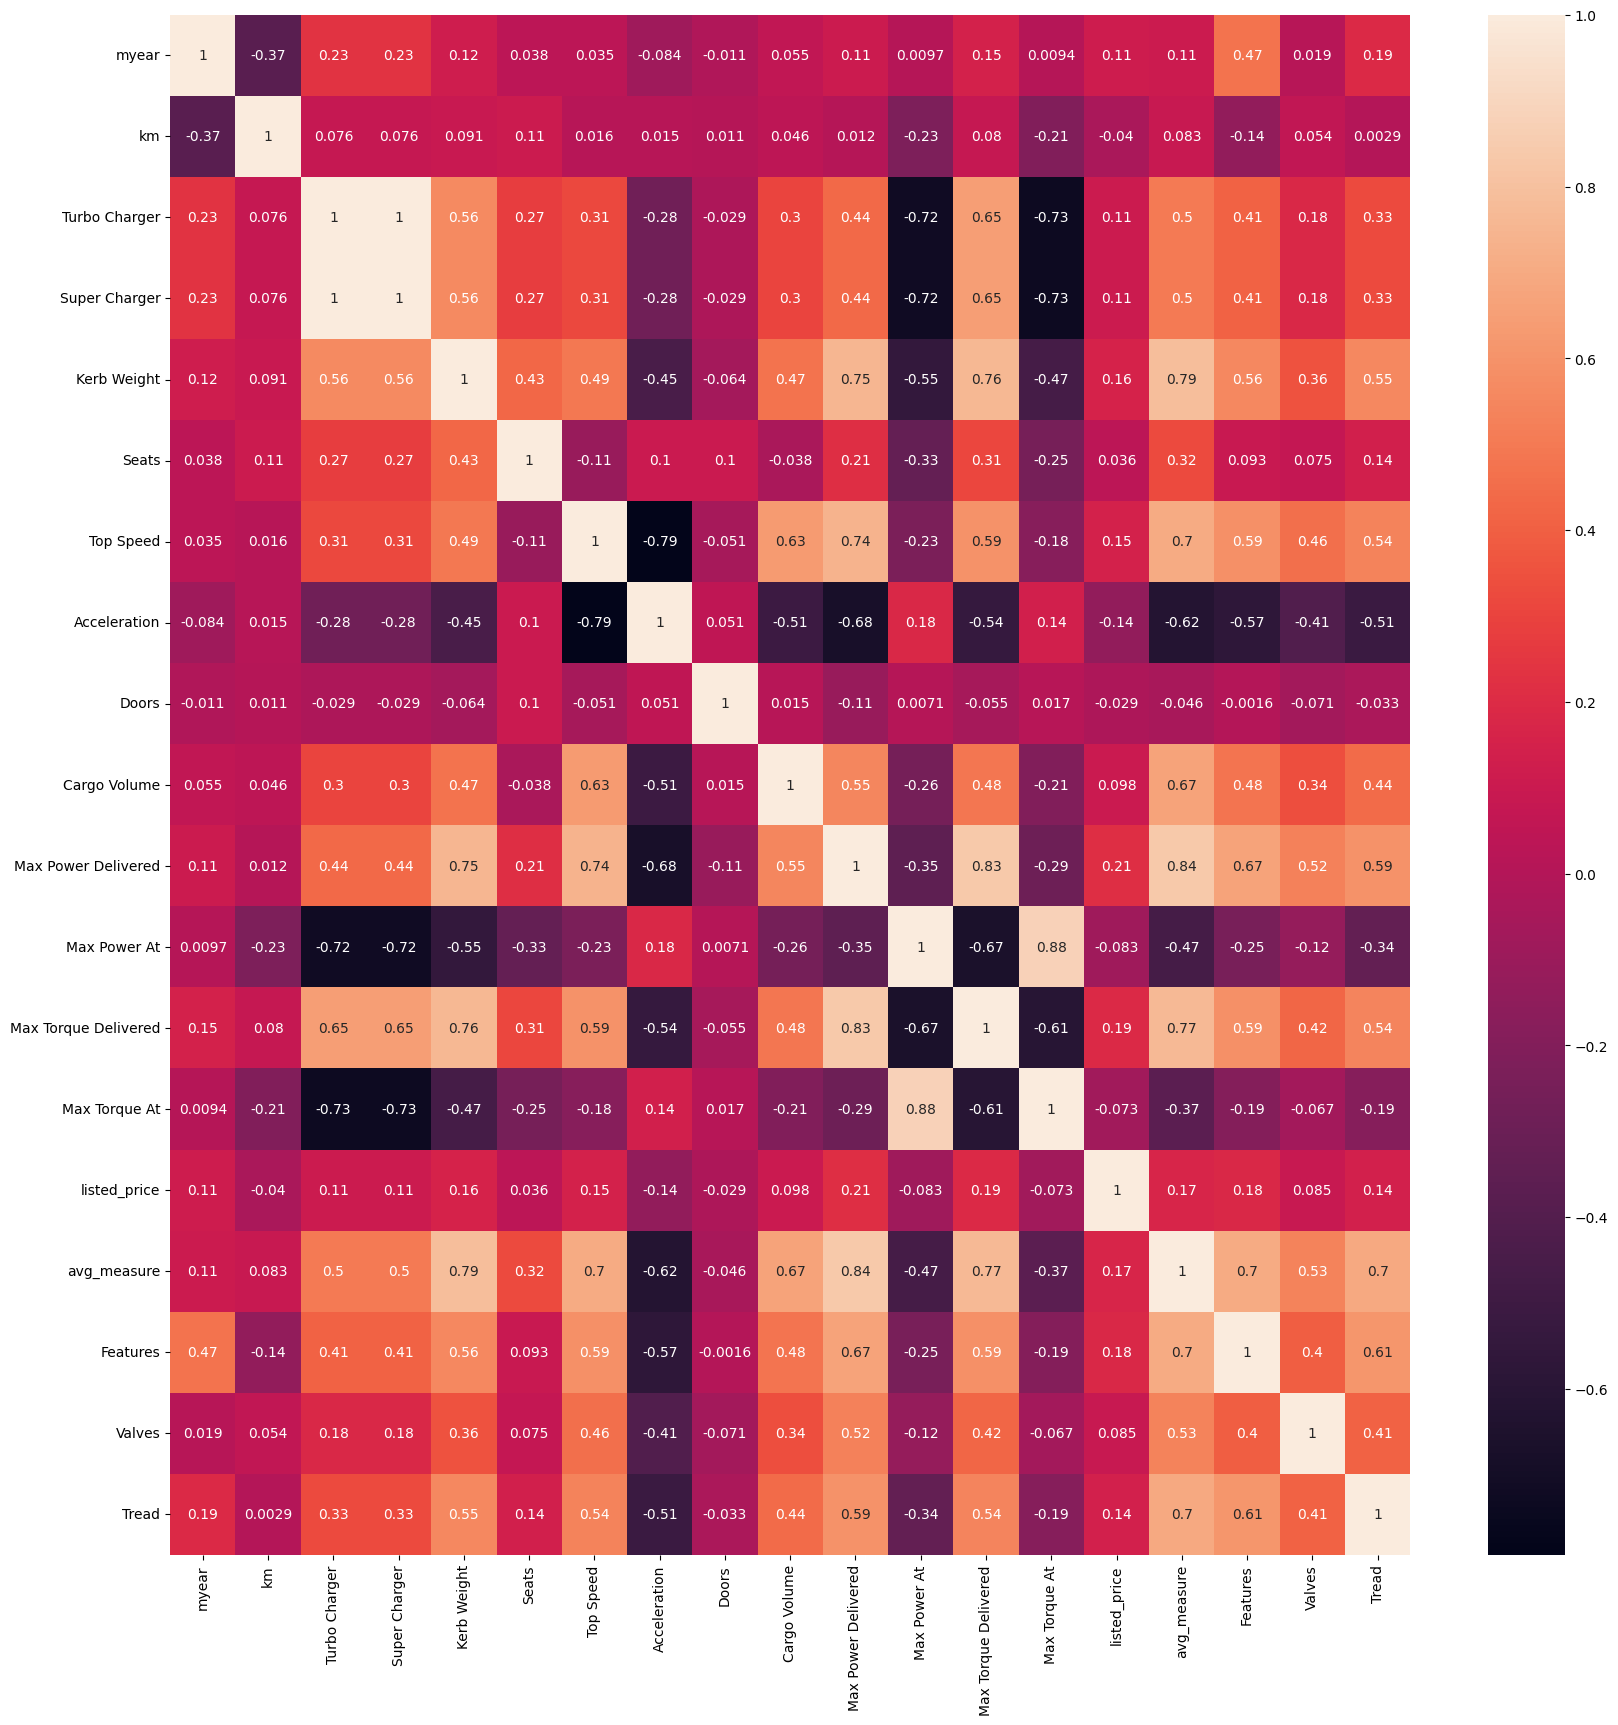

In [77]:
#Plotting a heatmap with the new features to check for highly collinear columns
plt.figure(figsize = (20, 20))
corr_mat = train.corr()
sns.heatmap(data = corr_mat, annot = True)

In [78]:
#Listing highly correlated columns
highly_corr = ['Super Charger', 'Max Power Delivered', 'Max Power At', 'Max Torque At']

In [79]:
#dropping them from the datset
train = train.drop(highly_corr, axis = 1)
test = test.drop(highly_corr, axis = 1)

In [80]:
#Working with owner type
train.owner_type.value_counts()

first               23731
second               7857
third                1731
fourth                398
fifth                  51
unregistered car        8
Name: owner_type, dtype: int64

In [81]:
#Creating a function to make it numerical from categorical
def convert_owner_type(row):
    if row['owner_type'] == 'unregistered car':
        return 6
    if row['owner_type'] == 'fifth':
        return 5
    if row['owner_type'] == 'fourth':
        return 4
    if row['owner_type'] == 'third':
        return 3
    if row['owner_type'] == 'second':
        return 2
    if row['owner_type'] == 'first':
        return 1

In [82]:
#Converting the columns in the dataset
train['owner_type'] = train.apply(convert_owner_type, axis = 1)
test['owner_type'] = test.apply(convert_owner_type, axis = 1)

<Axes: >

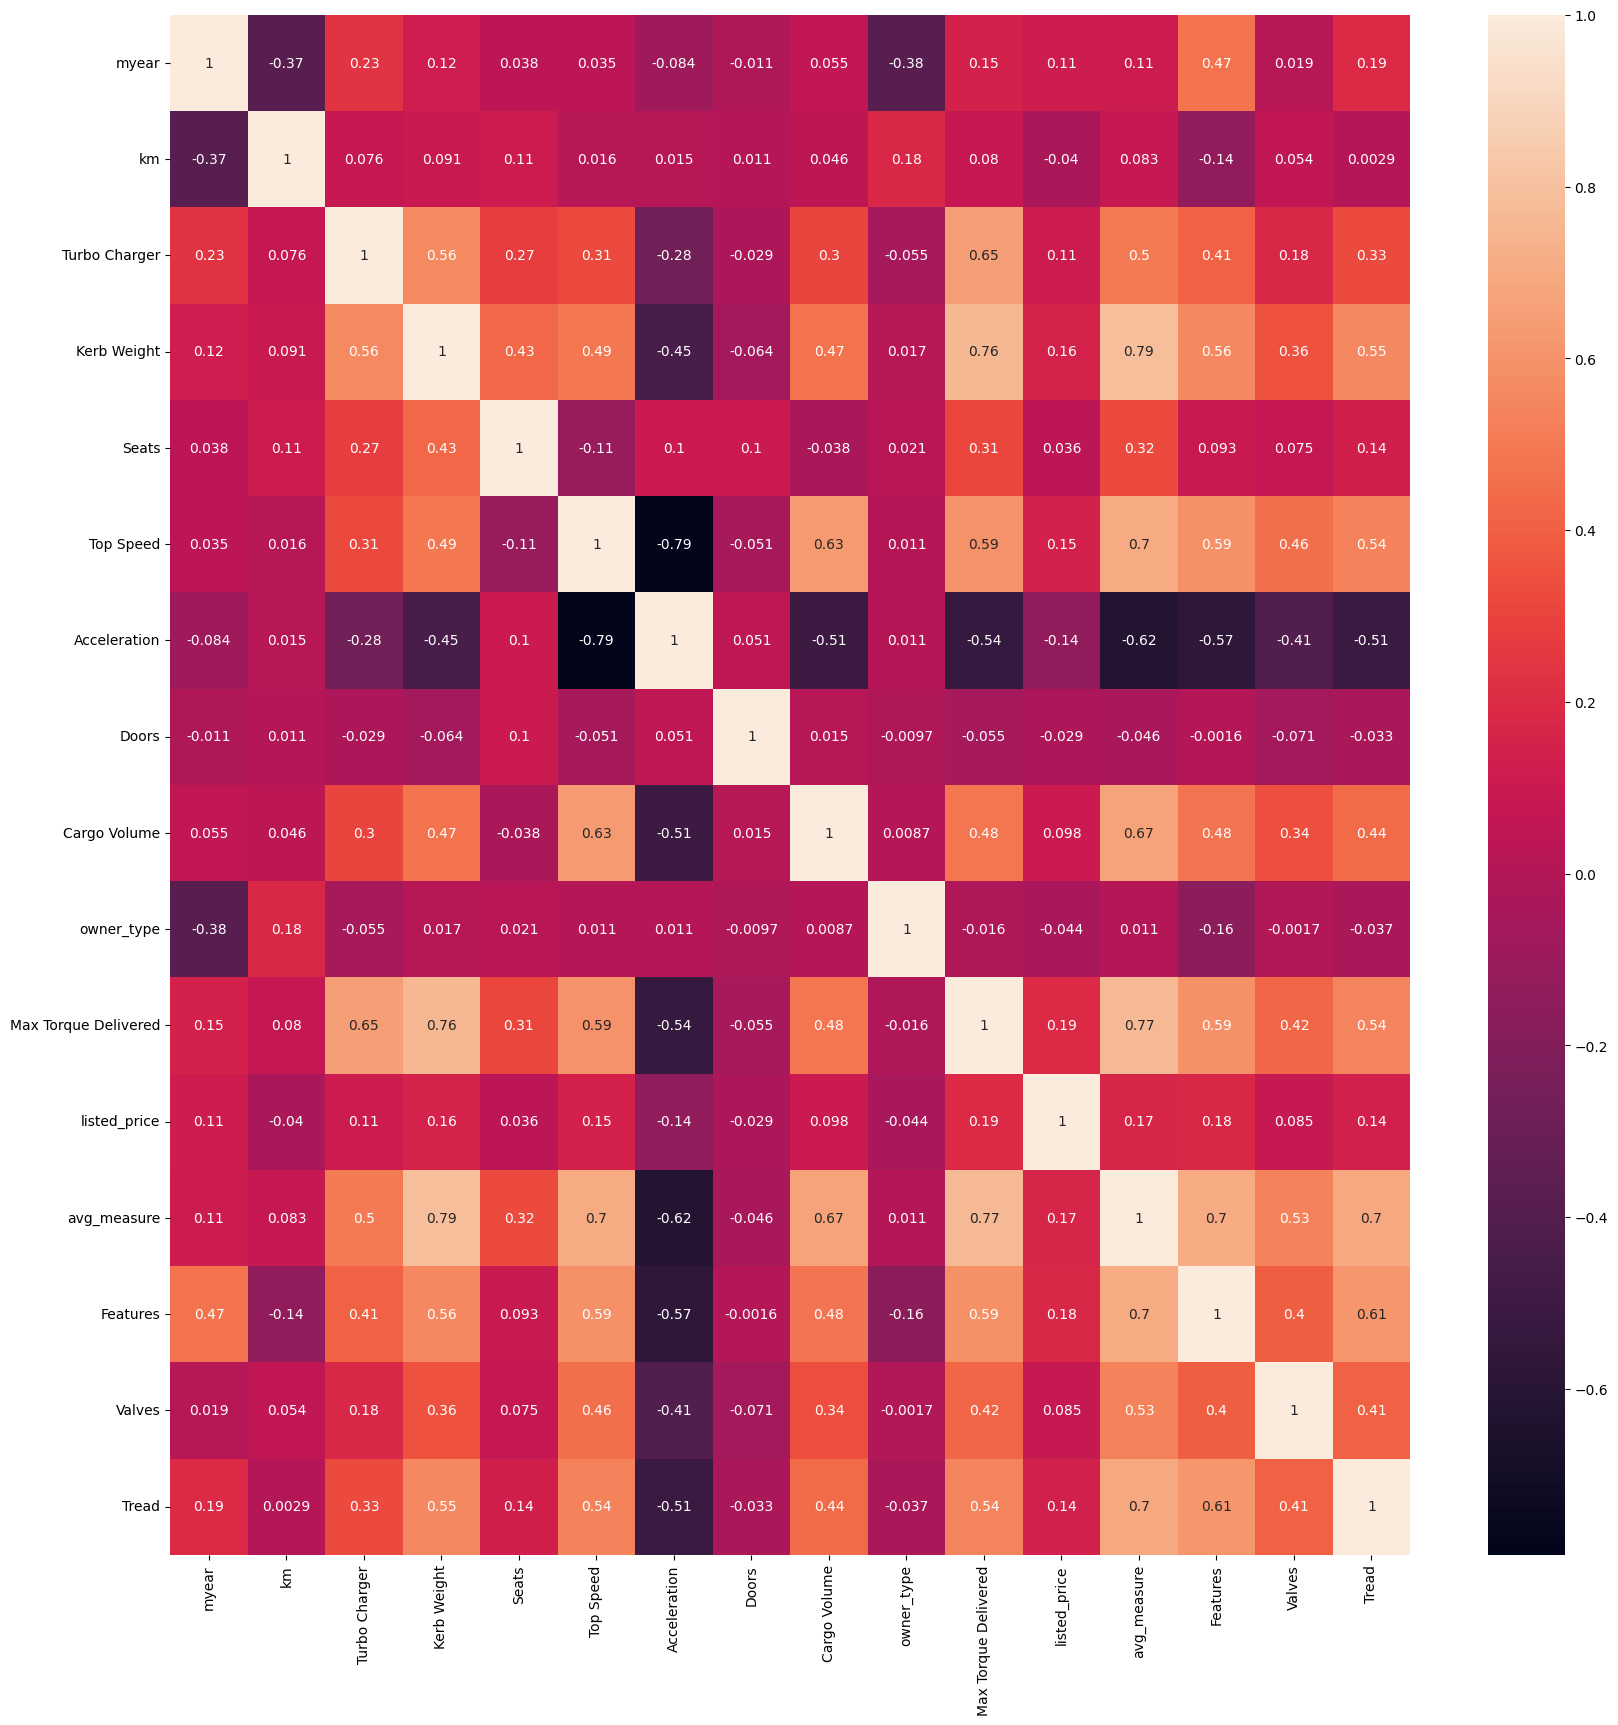

In [83]:
#Plotting the heatmap to check collinearity between columns again
plt.figure(figsize = (20, 20))
corr_mat = train.corr()
sns.heatmap(data = corr_mat, annot = True)

#### Below mentioned changes have already been applied to the data

In [84]:
'''
def correctcols(row):
    if ((row['model'] == 'toyota camry') & (row['fuel'] == 'electric')): #hybrid but most hybrids listed as petrol
        row['fuel'] == 'petrol'
    if row['Valves per Cylinder'] in [1, 5]: # audi a4(5) has 4, 1 has been mislabelled
         row['Valves per Cylinder'] = 4                     
    if row['No of Cylinder'] == 12: #bmw m7 series entry was wrong
        row['No of Cylinder'] = 6
    if row['No of Cylinder'] == 1: #these cars have been mislabelled
        row['No of Cylinder'] = 4
    if row['Seats'] in [0, 4]: #omni does not have 0 seats
        row['Seats'] = 5
    if row['Seats'] in [6, 8, 9, 10, 14, 13]:
        row['Seats'] = 7
    if row['fuel'] == 'electric':          #common sense
        row['No of Cylinder'] = 0
        row['Valves per Cylinder'] = 0
    #Getting rid of the floating point values 
    row['Valves per Cylinder'] = round(row['Valves per Cylinder'])
    row['No of Cylinder'] = round(row['No of Cylinder'])
    row['Seats'] = round(row['Seats'])
    return row
   '''     

"\ndef correctcols(row):\n    if ((row['model'] == 'toyota camry') & (row['fuel'] == 'electric')): #hybrid but most hybrids listed as petrol\n        row['fuel'] == 'petrol'\n    if row['Valves per Cylinder'] in [1, 5]: # audi a4(5) has 4, 1 has been mislabelled\n         row['Valves per Cylinder'] = 4                     \n    if row['No of Cylinder'] == 12: #bmw m7 series entry was wrong\n        row['No of Cylinder'] = 6\n    if row['No of Cylinder'] == 1: #these cars have been mislabelled\n        row['No of Cylinder'] = 4\n    if row['Seats'] in [0, 4]: #omni does not have 0 seats\n        row['Seats'] = 5\n    if row['Seats'] in [6, 8, 9, 10, 14, 13]:\n        row['Seats'] = 7\n    if row['fuel'] == 'electric':          #common sense\n        row['No of Cylinder'] = 0\n        row['Valves per Cylinder'] = 0\n    #Getting rid of the floating point values \n    row['Valves per Cylinder'] = round(row['Valves per Cylinder'])\n    row['No of Cylinder'] = round(row['No of Cylinder'])\n

In [85]:
'''
train = train.apply(correctcols, axis = 1)
test = test.apply(correctcols, axis = 1)
'''

'\ntrain = train.apply(correctcols, axis = 1)\ntest = test.apply(correctcols, axis = 1)\n'

### Removing Certain outliers/ Dealing with them

In [86]:
#Cars with mislabelled kms
def clean(row):
    if row['km'] > 1000000:
        row['km'] = 850000   
    return row

In [87]:
#Applying function to the dataset
train = train.apply(clean, axis = 1)
test = test.apply(clean, axis = 1)

In [88]:
#Dropping illogical listings
train = train.drop([4329, 16925], axis = 0)

In [89]:
#Getting the index of cars manufactured before 2000
train_oldcars_ids = train.loc[train.myear < 2000].index
test_oldcars_ids = test.loc[test.myear < 2000].index

In [90]:
#Removing the old cars
train = train.drop(train_oldcars_ids, axis = 0)
test = test.drop(test_oldcars_ids, axis = 0)

In [91]:
#Resetting the index of the datasets
train.index = range(len(train))
test.index = range(len(test))

In [92]:
train.shape

(33760, 31)

In [93]:
test.shape

(3774, 31)

In [94]:
train.to_csv('final_train2.csv', index = False)
test.to_csv('final_test2.csv', index = False)